# **Week 10: Analysis of Variance (ANOVA)**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```

# **HI THIS IS A WORK-IN-PROGRESS - EXPECTED TO DELIVER IN FRIDAY AFTERNOON**

In this workshop, we will focus on analysis of variance (ANOVA) techniques.

ANOVA is a family of statistical methods used to compare means across multiple groups and to understand how different factors contribute to variability in the data. We will explore:

- The fundamental ideas behind ANOVA.
- One-way and two-way ANOVA designs.
- Assumptions underlying these models.
- How to interpret results and post-hoc comparisons.
- Practical applications with real datasets.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Packages**
**Run the following lines of code**:

In [3]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘png’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: grid

Loading required package: knitr



**Do not modify the following**

In [4]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "knitr") %in% loadedNamespaces()))

})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🌈


## **One-Way ANOVA**

We will take a closer look at one-way ANOVA. The essence of two-way ANOVA is similar, although the formulas and interpretation are a bit more complex.


### **Formulation of One-Way ANOVA**

Consider a dataset $Y$ consisting of observations from $k$ **independent** groups.  
Let $Y_{ij}$ denote the $j$-th observation in group $i$, where $i = 1, \dots, k$ and $j = 1, \dots, n_i$.  

The one-way ANOVA model assumes that each observation can be modelled as:

$$
Y_{ij} = \lambda + \tau_i + \varepsilon_{ij},
$$:

where
- $\lambda$: baseline mean  
- $\tau_i$: effect of group $i$ (deviation from overall mean)  
- $\varepsilon_{ij}$: random error, assumed $\sim \mathcal{N}(0, \sigma^2)$  

In one-way ANOVA, the goal is to test whether the means of all groups are equal.  This can be formalised as follows:

$$
H_0: \tau_1 = \tau_2 = \dots = \tau_k = 0
$$

$$
H_1: \text{At least one } \tau_i \neq 0
$$

- **Interpretation:**  
  - $H_0$ states that all group means are equal.  
  - $H_1$ states that at least one group mean differs from the others.

Note that two-sample t-test assuming equal variance is a special case of one-way ANOVA where $k = 2$.

This formulation has a critical problem. It is impossible to uniquely identify a unique combination of $\tau_1, \tau_2, \dots, \tau_k$ and the baseline mean $\lambda$ that fully characterises the model. For example, if you decrease $\lambda$ by a small amount, you could increase each $\tau_i$ by the same amount and obtain the **same model specification**.  This is why the original parameterisation is not practical for estimation.

While the details are beyond the scope of this unit, it motivates the need for an **alternative (baseline-group) formulation**, which ensures the model is identifiable and interpretable.


#### **Alternative Formulation of One-Way ANOVA**

An equivalent way to write the one-way ANOVA model is to choose one group as a **baseline level** (say group 1) and express other group effects relative to it.  

Let $Y_{ij}$ denote the $j$-th observation in group $i$, where $i = 1, \dots, k$ and $j = 1, \dots, n_i$. Then we can write:

$$
Y_{ij} =
\begin{cases}
\mu + \varepsilon_{1j}, & i = 1 \text{ (baseline group)} \\
\mu + \delta_i + \varepsilon_{ij}, & i = 2, \dots, k
\end{cases}
$$

where  
- $\mu$: mean of the baseline group (group 1)  
- $\delta_i = \tau_i - \tau_1$: effect of group $i$ relative to the baseline group  
- $\varepsilon_{ij} \sim \mathcal{N}(0, \sigma^2)$: random error  

In the baseline-group formulation, testing whether all group means are equal can be written in terms of the relative effects $\delta_i$:

$$
H_0: \delta_2 = \delta_3 = \dots = \delta_k = 0
$$

$$
H_1: \text{At least one } \delta_i \neq 0, \ i = 2, \dots, k
$$

- **Interpretation:**  
  - $H_0$ states that all groups have the same mean as the baseline group (Group 1).  
  - $H_1$ states that at least one group differs from the baseline.  

This is the same as the standard ANOVA null hypothesis:

$$
H_0: \tau_1 = \tau_2 = \dots = \tau_k = 0
$$

### **Decomposition of Total Sum of Squares (SSTOT)**

Total variability in the data is:

$$
\text{SSTOT} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{..})^2
$$

Where $\bar{Y}_{..}$ is the overall mean.  

It is possible to show that

$$
\text{SSTOT} = \text{SSB} + \text{SSW}
$$

- **SSB** = Between-group Sum of Squares (due to differences between group means)  
- **SSW** = Within-group Sum of Squares (variability within groups)

**Between-Group Sum of Squares (SSB):**

$$
\text{SSB} = \sum_{i=1}^{k} n_i (\bar{Y}_{i\cdot} - \bar{Y}_{..})^2
$$

- $n_i$ = number of observations in group $i$  
- $\bar{Y}_{i\cdot}$ = mean of group \(i\)  
- $\bar{Y}_{..}$ = overall mean  

**Within-Group Sum of Squares (SSW):**

$$
\text{SSW} = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_{i\cdot})^2
$$


### **Essence of One-Way ANOVA**


Under the null hypothesis:

$$
H_0: \delta_2 = \delta_3 = \dots = \delta_k = 0
$$

- All group means are equal to the baseline group.  
- In this case, **SSB** will be relatively small compared to **SSW**, because the differences between group means are mostly due to random variation within groups.  
- **SSW** dominates the total variability.

When $H_0$ is **violated** (i.e., at least one group mean differs):  

- SSB becomes **large relative to SSW**, because there is substantial variability due to differences between group means.  
- This situation motivates the use of the **F-test**, which compares SSB and SSW.

**F-test rationale:**  

- Under $H_0$, the F-statistic:

$$
F = \frac{\text{MSB}}{\text{MSW}} = \frac{\text{SSB}/(k-1)}{\text{SSW}/(N-k)}
$$

is distributed according to an $F$ distribution with $(k-1, N-k)$ degrees of freedom ($F_{k-1, N-k}$).  
- If $H_0$ is violated, the observed $F$ statistic will be **large**, unlikely to occur under the null.  
- A large $F$ statistic provides **evidence to reject $H_0$**, indicating that not all group means are equal.

Unlike the t-test, which can be two-sided or one-sided, the F-test in ANOVA is **always a right-tailed test**.  This is because the F-statistic is a ratio of variances (MSB / MSW), which is **always non-negative**.  For example, take a look at the PDF of $F_{2,17}$


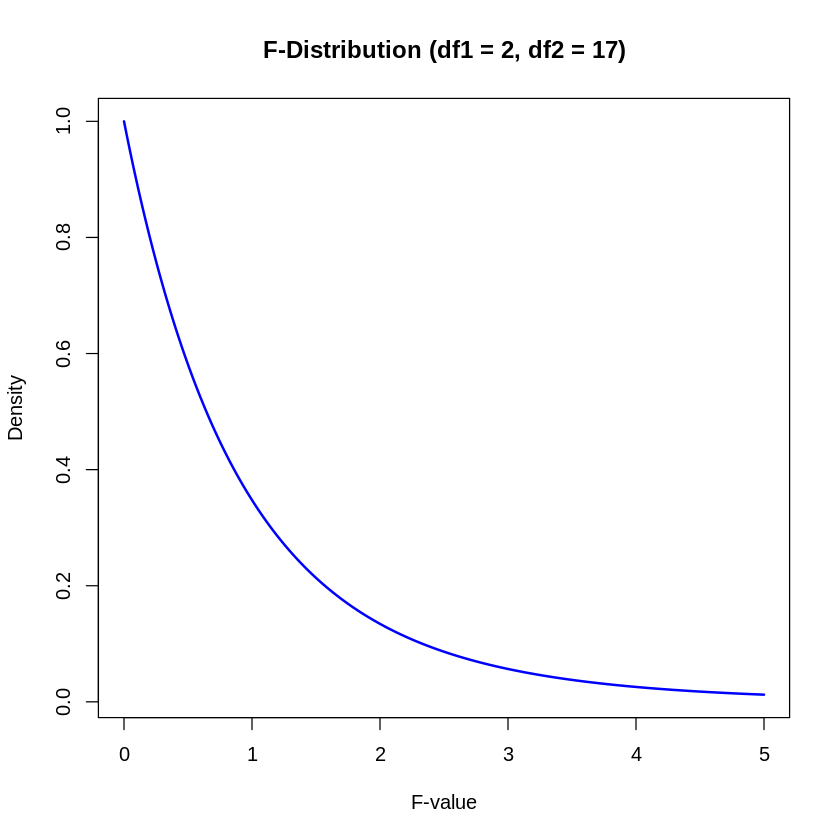

In [45]:
#F_{2,17}
vals = seq(0, 5, length.out = 500)
densities = df(vals, df1  = 2, df2 = 17)

# Plot
plot(vals, densities, type = "l", lwd = 2,
     main = "F-Distribution (df1 = 2, df2 = 17)",
     xlab = "F-value", ylab = "Density", col = "blue")

### **R Examples**

#### **R Quick Reference for F-Distribution**

Before we show how to run ANOVA in R, we will first discuss how to perform it manually.  This requires understanding and working with the $F$ distribution.


`R` supports the following functions for computing distributional quantities and simulating from $F$-distributions:

- `df(x, df1, df2, log = FALSE)` computes the **density** (PDF) of `F(df1, df2)` at `x`  
- `pf(q, df1, df2, lower.tail = TRUE, log.p = FALSE)` computes the **CDF** of `F(df1, df2)` at `q`  
- `qf(p, df1, df2, lower.tail = TRUE, log.p = FALSE)` computes the **p-quantile** of `F(df1, df2)`  
- `rf(n, df1, df2)` simulates `n` random numbers from an `F(df1, df2)` distribution


##### **Exercises**

The following dataset consists of three independent groups, each generated from a Gaussian distribution.

In [42]:

set.seed(123)
group1 = rnorm(5, 1)
group2 = rnorm(5,0)
group3 = rnorm(5,-1)

# Combine into long-format
df = data.frame(
  value = c(group1, group2, group3),
  group = factor(c(
    rep(1, length(group1)),
    rep(2, length(group2)),
    rep(3, length(group3))
  ))
)

df %>% head(10)


,value,group
,<dbl>,<fct>
1,0.4395244,1
2,0.7698225,1
3,2.5587083,1
4,1.0705084,1
5,1.1292877,1
6,1.7150650,2
7,0.4609162,2
8,-1.2650612,2
9,-0.6868529,2


###### **Exercise 1**

Verify the following identity:

$$
\text{SSTOT} = \text{SSB} + \text{SSW}.
$$


<details>
<summary>▶️ Click to show the solution</summary>

```r
df %>%
  summarise(SSTOT = (n()-1)*var(value)) %>%
    pull(SSTOT) -> SSTOT
df %>%
  group_by(group) %>%
    summarise(groupAvg = mean(value), ni = n(), .groups = "drop") %>%
    summarise(SSB = sum(ni * (groupAvg - mean(df$value))^2)) %>%
    pull(SSB)  -> SSB
df %>%
  group_by(group) %>%
  summarise(SSWi = (n()-1)*var(value), .groups = "drop") %>%
  summarise(SSW = sum(SSWi)) %>%
  pull(SSW) -> SSW

SSTOT
SSB
SSW

all.equal(SSTOT, SSB + SSW)
```

</details>

###### **Exercise 2**

Use ANOVA to *manually* test whether the group means are equal. Assume a 5% Type I error.


<details>
<summary>▶️ Click to show the solution</summary>

```r
# Hypotheses:
# H0: mu1 = mu2 = mu3
# H1: At least one mean is different

k = 3
n = nrow(df)
MSB = SSB/(k-1)
MSW = SSW/(n-k)
F_obs = MSB/MSW #F_obs ~ F(k-1, n-k) under H0
F_obs
F_obs > qf(0.95, df1 = k-1, df2 = n-k) #unlikely under H0
#Reject the null hypothesis
```

</details>

#### **ANOVA in R via `aov`**

R provides a dedicated function for performing ANOVA: the `aov()` function. It has a formula interface, similar to `t.test()`, `lm()`, and many other functions used in statistical modeling in R. However, `aov()` is not the only way to perform ANOVA in R. You can also use `lm()`, since ANOVA is a special case of (multiple) linear regression models. However, we will focus solely on ANOVA.

**Usage:**

```r
aov(formula,
    data = NULL,
    projections = FALSE,
    qr = TRUE,
    contrasts = NULL,
    ...)
```

**Arguments:**

- `formula`: a model formula of the form `response ~ predictors` (e.g., `y ~ group`)  
- `data`: a data frame containing variables in the model  
- `projections`: logical; if TRUE, returns projection matrices  
- `qr`: logical; if TRUE, returns the QR decomposition of the model fit  
- `contrasts`: a list of contrast specifications for factors  
- `...`: additional arguments passed to `lm()`  



Back to the previous simulated dataset:

In [73]:

set.seed(123)
group1 = rnorm(5, 1)
group2 = rnorm(5,0)
group3 = rnorm(5,-1)

# Combine into long-format
df = data.frame(
  value = c(group1, group2, group3),
  group = factor(c(
    rep(1, length(group1)),
    rep(2, length(group2)),
    rep(3, length(group3))
  ))
)

df %>% head(10)


,value,group
,<dbl>,<fct>
1,0.4395244,1
2,0.7698225,1
3,2.5587083,1
4,1.0705084,1
5,1.1292877,1
6,1.7150650,2
7,0.4609162,2
8,-1.2650612,2
9,-0.6868529,2


Note that the datatype of `group` is not integer, but factor. This means it should be treated as a categorical variable rather than a numeric one. This distinction is important for ANOVA because if group were treated as an integer, the model would interpret the group IDs (e.g., 1, 2, 3) as numeric values with a meaningful order or magnitude, rather than as mere labels representing different categories. Using a factor ensures that ANOVA correctly compares group means.